## Wilcoxon Signed-Rank Test 

To test whether the multimodal model performs significantly better than the baselines (visual or textual features only), a wilcoxon signed-rank test will be conducted.

**Null hypothesis 1:** The test accuracy samples obtained by training a classifier on joint visual-textual features and the accuracy samples obtained by training a classifier on visual features only come from the same distribution (the model trained on joint features does not perform significantly better than the baseline using visual features only.).

**Null hypothesis 2:** The test accuracy samples obtained by training a classifier on joint visual-textual features and the accuracy samples obtained by training a classifier on textual features only come from the same distribution (the model trained on joint features does not perform significantly better than the baseline using textual features only.).

In [1]:
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data

# test and validation accuracies (for all epochs) for visual features

test_accuracies_visual = pd.read_csv("/kaggle/input/results-visual-features-seeds/visual_results.csv")
test_acc_visual = test_accuracies_visual['test_accuracy'].tolist()
print(test_acc_visual)

val_accuracies_all_epochs_visual = pd.read_csv("/kaggle/input/results-visual-features-seeds/visual_all_val_accuracies.csv")
val_accuracies_all_epochs_visual = val_accuracies_all_epochs_visual.drop(val_accuracies_all_epochs_visual.columns[0],  axis=1)
val_accuracies_all_epochs_visual = val_accuracies_all_epochs_visual.drop(val_accuracies_all_epochs_visual.columns[0],  axis=1)
val_accuracies_all_epochs_visual.head()

# test and validation accuracies (for all epochs) for joint features

test_accuracies_joint = pd.read_csv("/kaggle/input/results-joint-features-seeds/joint_results.csv")
test_acc_joint = test_accuracies_joint['test_accuracy'].tolist()
print(test_acc_joint)

val_accuracies_all_epochs_joint = pd.read_csv("/kaggle/input/results-joint-features-seeds/joint_all_val_accuracies.csv")
val_accuracies_all_epochs_joint = val_accuracies_all_epochs_joint.drop(val_accuracies_all_epochs_joint.columns[0],  axis=1)
val_accuracies_all_epochs_visual

# test and validation accuracies (for all epochs) for textual features

test_accuracies_text1 = pd.read_csv("/kaggle/input/results-textual-features-seeds/bert_results_seeds_0_4.csv")
test_accuracies_text2 = pd.read_csv("/kaggle/input/results-textual-features-seeds/bert_results_seeds_5_9.csv")
test_accuracies_text1.head()

test_acc_text = pd.concat([test_accuracies_text1, test_accuracies_text2], ignore_index=True) # concatenate to one dataframe
test_acc_text = test_acc_text['test_accuracy'].tolist()
print(test_acc_text)

val_accuracies_all_epochs_text1 = pd.read_csv("/kaggle/input/results-textual-features-seeds/bert_all_val_accuracies_seeds_0_4.csv")
val_accuracies_all_epochs_text2 = pd.read_csv("/kaggle/input/results-textual-features-seeds/bert_all_val_accuracies_seeds_5_9.csv")

val_accuracies_all_epochs_text = pd.concat([val_accuracies_all_epochs_text1, val_accuracies_all_epochs_text2], ignore_index=True)
val_accuracies_all_epochs_text = val_accuracies_all_epochs_text.drop(val_accuracies_all_epochs_text.columns[0],  axis=1)
val_accuracies_all_epochs_text = val_accuracies_all_epochs_text.drop(val_accuracies_all_epochs_text.columns[0],  axis=1)
val_accuracies_all_epochs_text

[0.4382022619247436, 0.4719101190567016, 0.449438214302063, 0.4157303273677826, 0.3595505654811859, 0.3932584226131439, 0.4269662797451019, 0.4044943749904632, 0.4606741666793823, 0.449438214302063]
[0.6629213690757751, 0.6067415475845337, 0.6404494643211365, 0.6404494643211365, 0.6516854166984558, 0.6516854166984558, 0.6741573214530945, 0.6853932738304138, 0.5730336904525757, 0.7078651785850525]
[0.4382022619247436, 0.4382022619247436, 0.3820224702358246, 0.4157303273677826, 0.4157303273677826, 0.4382022619247436, 0.4382022619247436, 0.4382022619247436, 0.4719101190567016, 0.3820224702358246]


,epoch 1,epoch 2,epoch 3,epoch 4,epoch 5,epoch 6,epoch 7,epoch 8,epoch 9,epoch 10,epoch 11,epoch 12,epoch 13,epoch 14,epoch 15
0,0.202247,0.191011,0.235955,0.280899,0.269663,0.292135,0.280899,0.314607,0.303371,0.337079,0.370787,0.415730,0.438202,0.426966,0.460674
1,0.202247,0.191011,0.168539,0.179775,0.168539,0.179775,0.235955,0.258427,0.280899,0.292135,0.314607,0.382022,0.348315,0.393258,0.415730
2,0.168539,0.179775,0.213483,0.202247,0.235955,0.247191,0.247191,0.280899,0.292135,0.314607,0.359551,0.348315,0.370787,0.382022,0.382022
3,0.157303,0.191011,0.191011,0.191011,0.157303,0.247191,0.258427,0.269663,0.303371,0.303371,0.325843,0.314607,0.359551,0.382022,0.404494
4,0.179775,0.134831,0.157303,0.168539,0.224719,0.235955,0.247191,0.292135,0.269663,0.303371,0.303371,0.370787,0.382022,0.426966,0.415730
5,0.179775,0.224719,0.179775,0.224719,0.247191,0.258427,0.258427,0.280899,0.303371,0.314607,0.348315,0.370787,0.370787,0.382022,0.415730
6,0.123596,0.112360,0.168539,0.179775,0.202247,0.235955,0.325843,0.325843,0.303371,0.325843,0.348315,0.348315,0.348315,0.404494,0.415730
7,0.191011,0.269663,0.224719,0.224719,0.269663,0.224719,0.258427,0.280899,0.269663,0.280899,0.348315,0.348315,0.382022,0.415730,0.415730
8,0.168539,0.191011,0.213483,0.213483,0.258427,0.269663,0.247191,0.314607,0.292135,0.325843,0.370787,0.404494,0.382022,0.449438,0.460674
9,0.134831,0.157303,0.168539,0.157303,0.213483,0.191011,0.235955,0.258427,0.247191,0.269663,0.292135,0.292135,0.325843,0.348315,0.359551


In [3]:
print(test_acc_joint)
print(test_acc_visual)
print(test_acc_text)

[0.6629213690757751, 0.6067415475845337, 0.6404494643211365, 0.6404494643211365, 0.6516854166984558, 0.6516854166984558, 0.6741573214530945, 0.6853932738304138, 0.5730336904525757, 0.7078651785850525]
[0.4382022619247436, 0.4719101190567016, 0.449438214302063, 0.4157303273677826, 0.3595505654811859, 0.3932584226131439, 0.4269662797451019, 0.4044943749904632, 0.4606741666793823, 0.449438214302063]
[0.4382022619247436, 0.4382022619247436, 0.3820224702358246, 0.4157303273677826, 0.4157303273677826, 0.4382022619247436, 0.4382022619247436, 0.4382022619247436, 0.4719101190567016, 0.3820224702358246]


In [4]:
# conduct significance testing for visual baseline

stat_vis, p_value_vis = stats.wilcoxon(test_acc_joint, test_acc_visual, alternative='greater') 

print(f'Wilcoxon Signed-Rank Test: stat={stat_vis}, p-value={p_value_vis}')

if p_value_vis < 0.05:
    print("We reject the null hypothesis 1. The multimodal model performs significantly better than the visual baseline.")
else:
    print("We cannot reject the null hypothesis 1. The multimodal model does not perform significantly better than the visual baseline.")


Wilcoxon Signed-Rank Test: stat=55.0, p-value=0.0009765625
We reject the null hypothesis 1. The multimodal model performs significantly better than the visual baseline.


In [5]:
# conduct significance testing for textual baseline

stat_text, p_value_text = stats.wilcoxon(test_acc_joint, test_acc_text, alternative='greater') 

print(f'Wilcoxon Signed-Rank Test: stat={stat_text}, p-value={p_value_text}')

if p_value_text < 0.05:
    print("We reject the null hypothesis 2. The multimodal model performs significantly better than the textual baseline.")
else:
    print("We cannot reject the null hypothesis 2. The multimodal model does not perform significantly better than the textual baseline.")

Wilcoxon Signed-Rank Test: stat=55.0, p-value=0.0009765625
We reject the null hypothesis 2. The multimodal model performs significantly better than the textual baseline.


Both tests yield the same p-value. This is quite unusual. Therefore, a wilcoxon signed rank test will additionally performed between the visual and textual test accuracies.

**Null hypothesis 3**: The test accuracy samples obtained by training a classifier on textual features and the accuracy samples obtained by training a classifier on visual features only come from the same distribution.

In [6]:
# conduct significance testing for textual and visual baseline

stat, p_value = stats.wilcoxon(test_acc_visual, test_acc_text) 

print(f'Wilcoxon Signed-Rank Test: stat={stat}, p-value={p_value}')

if p_value < 0.05:
    print("We can reject the Nullhypothesis 3. The differences in the distribution of test accuracies are significant.")
else:
    print("We accept the Nullhypothesis. The differences in test accuracies of visual and textual features are not significant. They likely stem from the same distribution.")

Wilcoxon Signed-Rank Test: stat=18.0, p-value=1.0
We accept the Nullhypothesis. The differences in test accuracies of visual and textual features are not significant. They likely stem from the same distribution.


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


[0.0674157291650772, 0.1460674107074737, 0.2471910119056701, 0.3146067559719085, 0.4606741666793823, 0.5393258333206177, 0.6292135119438171, 0.6629213690757751, 0.7078651785850525, 0.6741573214530945, 0.6966292262077332, 0.6629213690757751, 0.6741573214530945, 0.7078651785850525, 0.6853932738304138]
[0.1685393303632736, 0.2134831398725509, 0.2134831398725509, 0.2134831398725509, 0.2808988690376282, 0.3146067559719085, 0.3146067559719085, 0.3146067559719085, 0.3370786607265472, 0.3370786607265472, nan, nan, nan, nan, nan]
[0.1685393303632736, 0.2134831398725509, 0.2134831398725509, 0.2134831398725509, 0.2808988690376282, 0.3146067559719085, 0.3146067559719085, 0.3146067559719085, 0.3370786607265472, 0.3370786607265472, nan, nan, nan, nan, nan]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

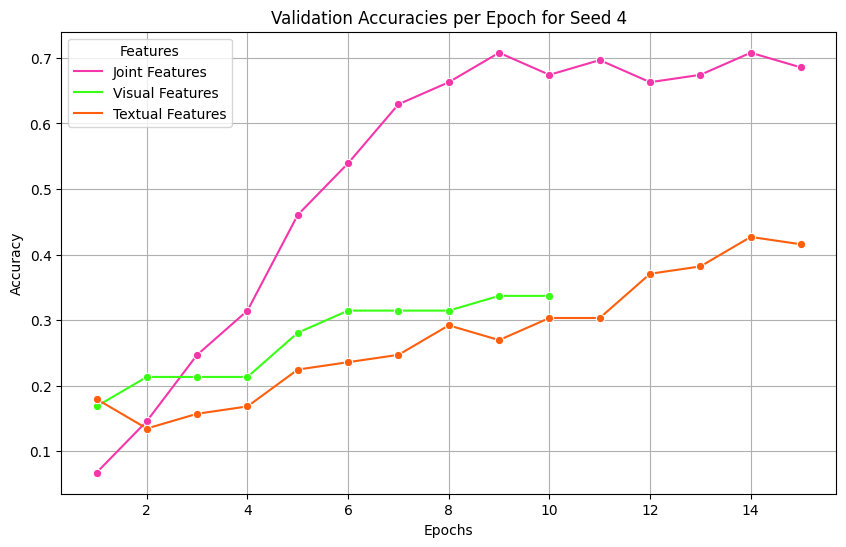

In [7]:
# plot overall results for test accuracies for seed=4
seed_index = 4

val_accuracies_all_epochs_joint_seed_4 = val_accuracies_all_epochs_joint.iloc[seed_index].tolist()
print(val_accuracies_all_epochs_joint_seed_4)

val_accuracies_all_epochs_visual_seed_4 = val_accuracies_all_epochs_visual.iloc[seed_index].tolist()
print(val_accuracies_all_epochs_visual_seed_4)

val_accuracies_all_epochs_textual_seed_4 = val_accuracies_all_epochs_text.iloc[seed_index].tolist()
print(val_accuracies_all_epochs_visual_seed_4)


data = {
    'Epochs': list(range(1, len(val_accuracies_all_epochs_joint_seed_4) + 1)),
    'Joint Features': val_accuracies_all_epochs_joint_seed_4,
    'Visual Features': val_accuracies_all_epochs_visual_seed_4,
    'Textual Features': val_accuracies_all_epochs_textual_seed_4
}
df = pd.DataFrame(data)

# melt the DataFrame so we have the features in one column
melted_df = df.melt(id_vars=['Epochs'], var_name='Features', value_name='Accuracy')

plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='Epochs', y='Accuracy', hue='Features', marker='o', palette={'Joint Features': '#f535aa', 'Visual Features': '#39ff14', 'Textual Features': '#ff5e0c'})

plt.title(f'Validation Accuracies per Epoch for Seed {seed_index}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

output_path = f'/kaggle/working/validation_accuracies_seed_{seed_index}.png'
plt.savefig(output_path)

plt.show()